In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Zindi - iX Mobile Banking Prediction Challenge.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [16]:
df.isnull().sum().sort_values(ascending=False)

FQ31            107577
FQ28            106940
FQ30            106331
FQ27            105246
FQ17             97099
FQ36             96963
FQ5              87261
FQ35             82557
FQ24             70014
FQ3              62228
FQ2              59322
FQ7              47826
FQ6              47787
FQ32             47650
FQ19             47407
FQ34             31794
FQ20             24679
FQ21             24635
FQ11             24570
FQ29             24534
age                322
FQ33                 2
FQ37                 0
FQ25                 0
FQ26                 0
ID                   0
FQ18                 0
FQ23                 0
FQ22                 0
country_code         0
FQ16                 0
FQ15                 0
FQ14                 0
FQ13                 0
FQ12                 0
FQ10                 0
FQ9                  0
FQ8                  0
FQ4                  0
FQ1                  0
region               0
Target               0
dtype: int64

In [14]:
df.shape

(108446, 42)

In [7]:
df.columns

Index(['ID', 'country_code', 'region', 'age', 'FQ1', 'FQ2', 'FQ3', 'FQ4',
       'FQ5', 'FQ6', 'FQ7', 'FQ8', 'FQ9', 'FQ10', 'FQ11', 'FQ12', 'FQ13',
       'FQ14', 'FQ15', 'FQ16', 'FQ17', 'FQ18', 'FQ19', 'FQ20', 'FQ21', 'FQ22',
       'FQ23', 'FQ24', 'FQ35', 'FQ36', 'FQ25', 'FQ26', 'FQ27', 'FQ28', 'FQ29',
       'FQ30', 'FQ31', 'FQ32', 'FQ33', 'FQ34', 'FQ37', 'Target'],
      dtype='object')

Essas colunas são típicas de datasets de competições de previsão, onde os nomes das variáveis (FQ1, FQ2, ..., FQ37) geralmente representam respostas a perguntas de um formulário ou características extraídas de dados de clientes. Aqui está um resumo do que cada coluna provavelmente significa:

- **ID**: Identificador único de cada registro/usuário.
- **country_code**: Código do país do usuário.
- **region**: Região geográfica do usuário.
- **age**: Idade do usuário.
- **FQ1** a **FQ37**: Variáveis de formulário (provavelmente respostas a perguntas específicas, características comportamentais, financeiras ou demográficas coletadas na pesquisa).
- **Target**: Variável alvo, ou seja, o que se deseja prever (por exemplo, adesão ao mobile banking, uso do app, etc.).

Sem o dicionário de dados oficial, não é possível saber exatamente o que cada FQ representa, mas normalmente são respostas a perguntas do questionário aplicado aos usuários.

### Percentual de valores nulos

In [21]:
linhas = df.shape[0]
for coluna in df.columns:
    qtd_nulos = df[coluna].isnull().sum()
    porcentagem = (qtd_nulos / linhas) * 100
    if porcentagem > 0:
        print(f'{coluna}: {porcentagem:.2f}% nulos')

age: 0.30% nulos
FQ2: 54.70% nulos
FQ3: 57.38% nulos
FQ5: 80.46% nulos
FQ6: 44.07% nulos
FQ7: 44.10% nulos
FQ11: 22.66% nulos
FQ17: 89.54% nulos
FQ19: 43.71% nulos
FQ20: 22.76% nulos
FQ21: 22.72% nulos
FQ24: 64.56% nulos
FQ35: 76.13% nulos
FQ36: 89.41% nulos
FQ27: 97.05% nulos
FQ28: 98.61% nulos
FQ29: 22.62% nulos
FQ30: 98.05% nulos
FQ31: 99.20% nulos
FQ32: 43.94% nulos
FQ33: 0.00% nulos
FQ34: 29.32% nulos


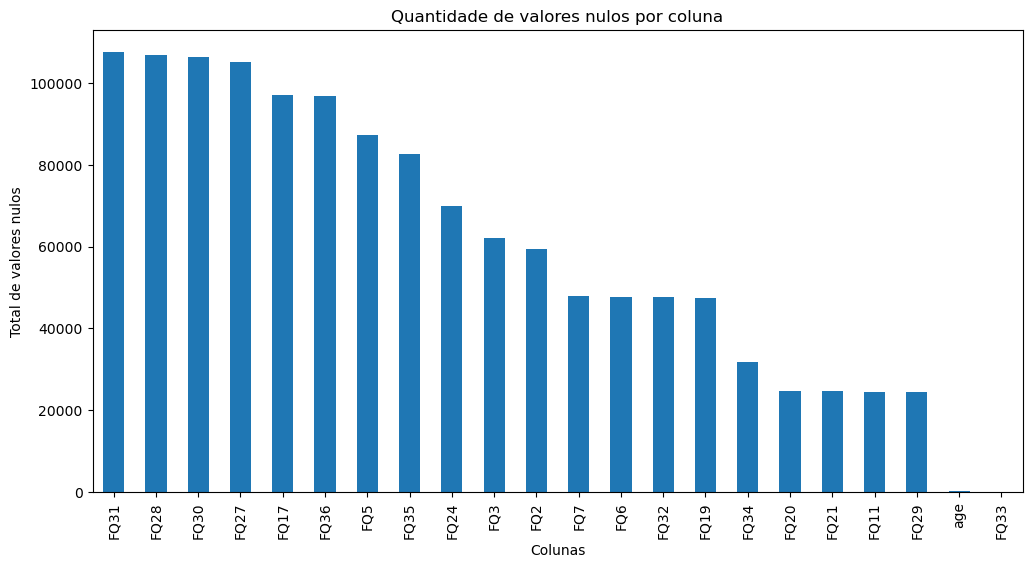

In [29]:
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]  # mostra apenas colunas com nulos

plt.figure(figsize=(12, 6))
nulos.sort_values(ascending=False).plot(kind='bar')
plt.title('Quantidade de valores nulos por coluna')
plt.ylabel('Total de valores nulos')
plt.xlabel('Colunas')
plt.show()

### Criando hipoteses do que pode ter gerado valores ausentes

In [24]:
df.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [25]:
df.FQ1.value_counts()

FQ1
2    58373
1    48896
3      817
4      360
Name: count, dtype: int64

1. **Pergunta não se aplica à realidade do respondente**  
   Exemplo: Perguntas sobre produtos financeiros que o usuário nunca utilizou.

2. **Desconhecimento sobre o tema**  
   O respondente pode não saber responder por falta de experiência ou informação sobre finanças.

3. **Desconforto ou privacidade**  
   Algumas perguntas podem ser sensíveis (renda, dívidas, uso de serviços bancários), levando o usuário a pular.

4. **Cansaço ou desinteresse**  
   Questionários longos podem causar abandono parcial, resultando em respostas ausentes nas últimas perguntas.

5. **Problemas de acesso ou conectividade**  
   Em algumas regiões, limitações tecnológicas podem interromper o preenchimento do formulário.

6. **Alfabetização ou barreiras linguísticas**  
   Dificuldades de compreensão podem levar a não resposta, especialmente em regiões com baixa escolaridade.

### Verificando a distribuição de idade do dataset

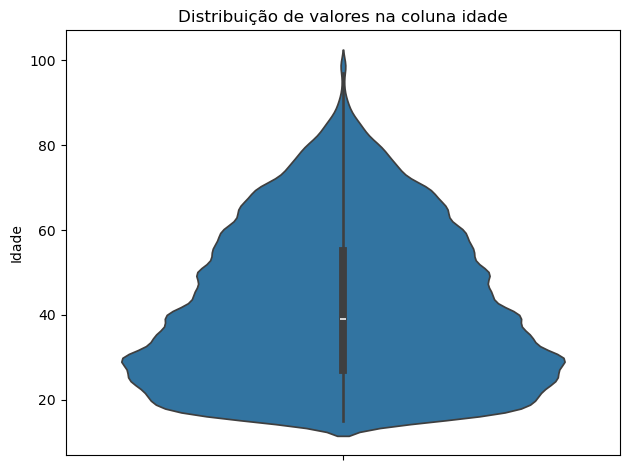

In [34]:
plt.Figure(figsize=(10, 8))
sns.violinplot(data=df, y='age')
plt.title('Distribuição de valores na coluna idade')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

Os valores da coluna **idade** apresentam assimetria (skewness) **positiva** (à direita).

**Justificativa:**
- A média (41.86) é maior que a mediana (50%, que é 39.0).
- O valor máximo (99) está bem distante da mediana e da média, enquanto o mínimo é 15.
- O 3º quartil (75%) é 55, indicando que há uma cauda mais longa para idades mais altas.

**Conclusão:**  
A distribuição é assimétrica à direita (skewed right), com mais valores concentrados em idades mais baixas e uma cauda para idades mais altas.

### Verificando a distribuição do target

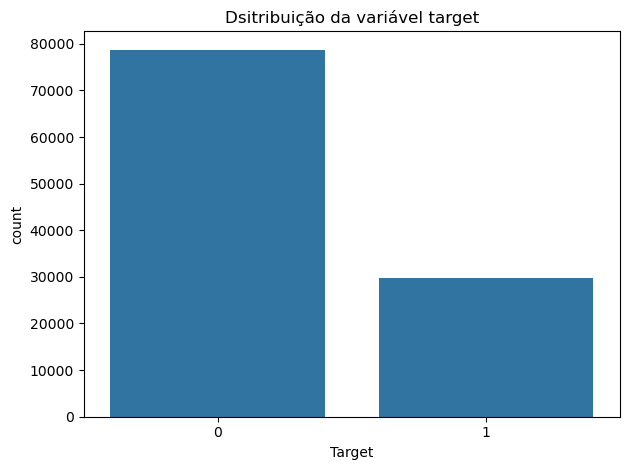

In [38]:
plt.Figure(figsize=(10, 8))
sns.countplot(data=df, x='Target')
plt.title('Dsitribuição da variável target')
plt.xlabel('Target')
plt.tight_layout()
plt.show()

O principal insight ao analisar a variável **Target** é que **a maioria dos respondentes não utiliza serviços financeiros**:

- **0 (não utilizam serviços financeiros via internet):** 78.735 pessoas (~72,5%)
- **1 (utilizam ou utilizaram serviços financeiros via internet):** 29.711 pessoas (~27,5%)

**Conclusão:**  
Existe um desbalanceamento na variável alvo, com uma proporção significativamente maior de pessoas que **não utilizam** serviços financeiros em relação às que utilizam. Isso pode indicar

1. barreiras de acesso
2. falta de interesse

ou outros fatores socioeconômicos que dificultam a inclusão financeira dessa população. Esse desbalanceamento também deve ser considerado ao treinar modelos de machine learning.

### Verificando a idade de quem já utilizou serviços bancarios na internet

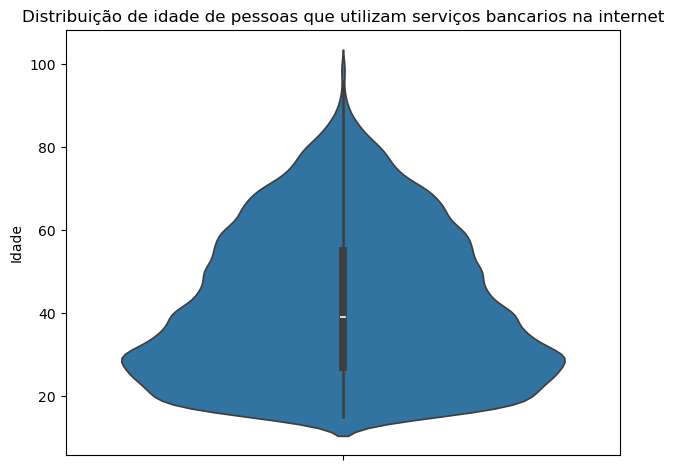

In [40]:
df_target = df[df['Target'] == 1]
plt.Figure(figsize=(10, 8))
sns.violinplot(data=df_target, y='age')
plt.title('Distribuição de idade de pessoas que utilizam serviços bancarios na internet')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

Praticamente **não existem diferenças no perfil de idade** entre o total do dataset e o grupo com `Target == 1` (quem utiliza serviços financeiros).

Veja os principais pontos:

- **Média**: 41.86 (total) vs 41.81 (Target=1)
- **Mediana (50%)**: 39.0 (ambos)
- **Desvio padrão**: 17.88 (total) vs 17.87 (Target=1)
- **Quartis (25% e 75%)**: Iguais em ambos (27.0 e 55.0)
- **Mínimo e máximo**: Iguais (15 e 99)

**Conclusão:**  
A distribuição de idade dos usuários que utilizam serviços financeiros é praticamente igual à distribuição de idade do dataset total. Isso sugere que, neste caso, a idade não é um fator discriminante relevante para o uso de serviços financeiros na amostra analisada.

### O que uma posse de conta bancaria (FQ37) influencia a probabilidade de serviços bancarios na internet?

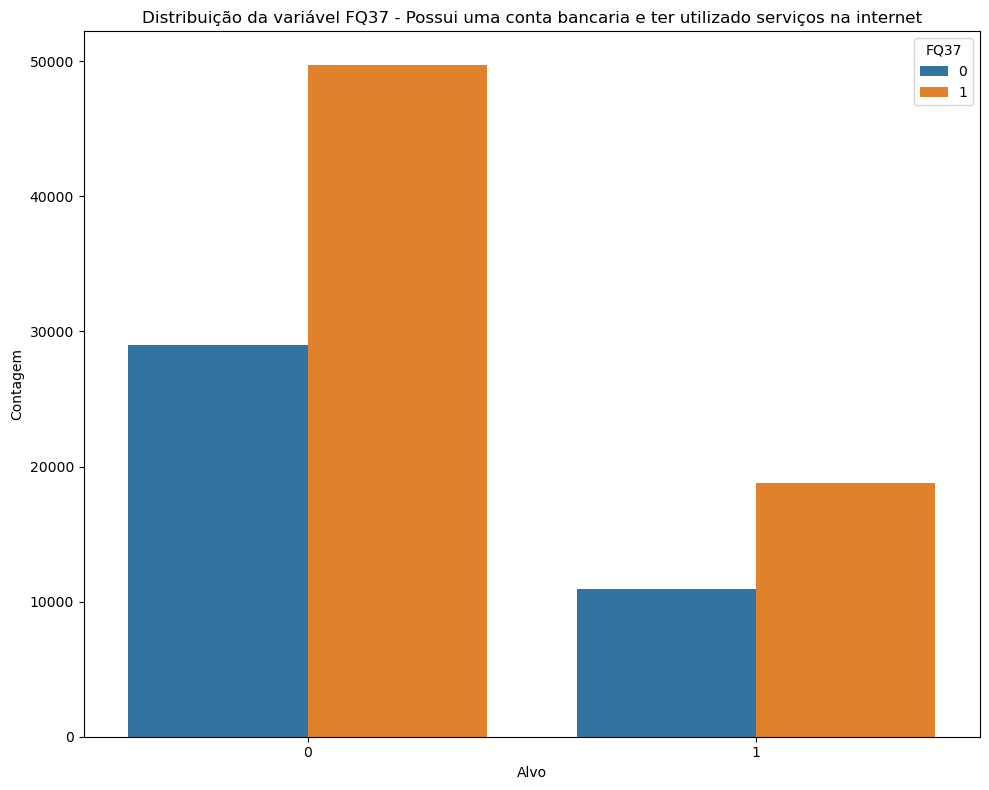

In [50]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Target', hue='FQ37')
plt.title('Distribuição da variável FQ37 - Possui uma conta bancaria e ter utilizado serviços na internet')
plt.ylabel('Contagem')
plt.xlabel('Alvo')
plt.tight_layout()
plt.show()

In [56]:
# Cálculo de probabilidade condicional
df_fq37 = df[df['FQ37'] == 1]  # pessoas que possuem uma conta bancária
probabilidade = (df_fq37['Target'] == 1).mean()
print(f'A probabilidade de uma pessoa que possui conta bancária utilizar serviços financeiros pela internet é: {probabilidade:.2%}')

A probabilidade de uma pessoa que possui conta bancária utilizar serviços financeiros pela internet é: 27.38%


In [54]:
# Probabilidade de quem usa serviços financeiros ter conta bancária
df_target1 = df[df['Target'] == 1]
prob_inversa = (df_target1['FQ37'] == 1).mean()
print(f'Probabilidade de quem usa serviços financeiros ter conta bancária: {prob_inversa:.2%}')

Probabilidade de quem usa serviços financeiros ter conta bancária: 63.11%


In [55]:
# Probabilidade de quem NÃO tem conta bancária usar serviços financeiros
df_fq37_0 = df[df['FQ37'] == 0]
prob_sem_conta = (df_fq37_0['Target'] == 1).mean()
print(f'Probabilidade de quem NÃO tem conta bancária usar serviços financeiros: {prob_sem_conta:.2%}')

Probabilidade de quem NÃO tem conta bancária usar serviços financeiros: 27.43%


In [58]:
# Probabilidade para ambos os grupos
prob_com_conta = (df[df['FQ37'] == 1]['Target'] == 1).mean()
prob_sem_conta = (df[df['FQ37'] == 0]['Target'] == 1).mean()
print(f'Com conta bancária: {prob_com_conta:.2%} | Sem conta bancária: {prob_sem_conta:.2%}')

Com conta bancária: 27.38% | Sem conta bancária: 27.43%


O gráfico mostra a distribuição da variável FQ37, que representa se uma pessoa possui conta bancária e utiliza serviços na internet. Na legenda, "0" representa não ter conta bancária e "1" representa ter conta bancária. O eixo horizontal tem dois valores (0 e 1) que parecem representar se usa (1) ou não usa (0) serviços financeiros pela internet.

Das probabilidades apresentadas:

- Apenas 27,38% das pessoas com conta bancária utilizam serviços financeiros pela internet
- 63,11% das pessoas que usam serviços financeiros na internet possuem conta bancária
- 27,43% das pessoas sem conta bancária usam serviços financeiros pela internet
- A taxa de uso de serviços financeiros online é praticamente idêntica entre quem tem conta (27,38%) e quem não tem conta bancária (27,43%)

## Insights

1. **Baixa adoção digital entre correntistas**: Menos de 1/3 das pessoas com conta bancária utilizam serviços financeiros online, indicando uma grande oportunidade para bancos aumentarem a digitalização de seus clientes.
    
2. **Acesso sem bancarização tradicional**: O fato de 27,43% das pessoas sem conta bancária utilizarem serviços financeiros online sugere forte presença de serviços financeiros alternativos, provavelmente mobile money ou fintechs.
    
3. **Paridade de acesso digital**: A taxa quase idêntica de uso de serviços online entre pessoas com e sem conta bancária (27,38% vs 27,43%) sugere que ter uma conta bancária tradicional não está impulsionando o uso de serviços digitais.
    
4. **Predominância de não-usuários**: Em ambos os grupos (com e sem conta), mais de 70% não utilizam serviços financeiros pela internet, indicando barreiras significativas à adoção digital.
    

## Hipóteses

1. **Hipótese de infraestrutura**: A baixa taxa de adoção de serviços financeiros online (cerca de 27% em ambos os grupos) pode ser resultado de infraestrutura digital insuficiente (acesso limitado à internet, conectividade instável).
    
2. **Hipótese de confiança e educação financeira**: A semelhança nas taxas entre grupos sugere que fatores como confiança nos serviços digitais e educação financeira digital podem ser mais determinantes que a posse de conta bancária.
    
3. **Hipótese de serviços alternativos**: A taxa similar entre os grupos pode indicar que serviços móveis não-bancários (como M-Pesa e similares) estão atendendo efetivamente populações sem acesso bancário tradicional.
    
4. **Hipótese de experiência do usuário**: Os bancos tradicionais podem não estar oferecendo experiências digitais suficientemente atraentes para impulsionar a adoção entre seus clientes.
    
5. **Hipótese de necessidade**: As necessidades financeiras básicas de grande parte da população podem estar sendo atendidas sem necessidade de serviços digitais, sugerindo oportunidade para desenvolver casos de uso mais relevantes.

### Analisando os comportamentos financeiros mais comuns

1. FQ1 -> USO DE CAIXA ELETRONICO
2. FQ4 -> POSSE DE CARTÃO DE CREDITO
3. FQ20 -> ENVIO DE DINHEIRO PARA AMIGOS OU FAMILIARES.

In [59]:
variaveis = ['FQ1', 'FQ4', 'FQ20']

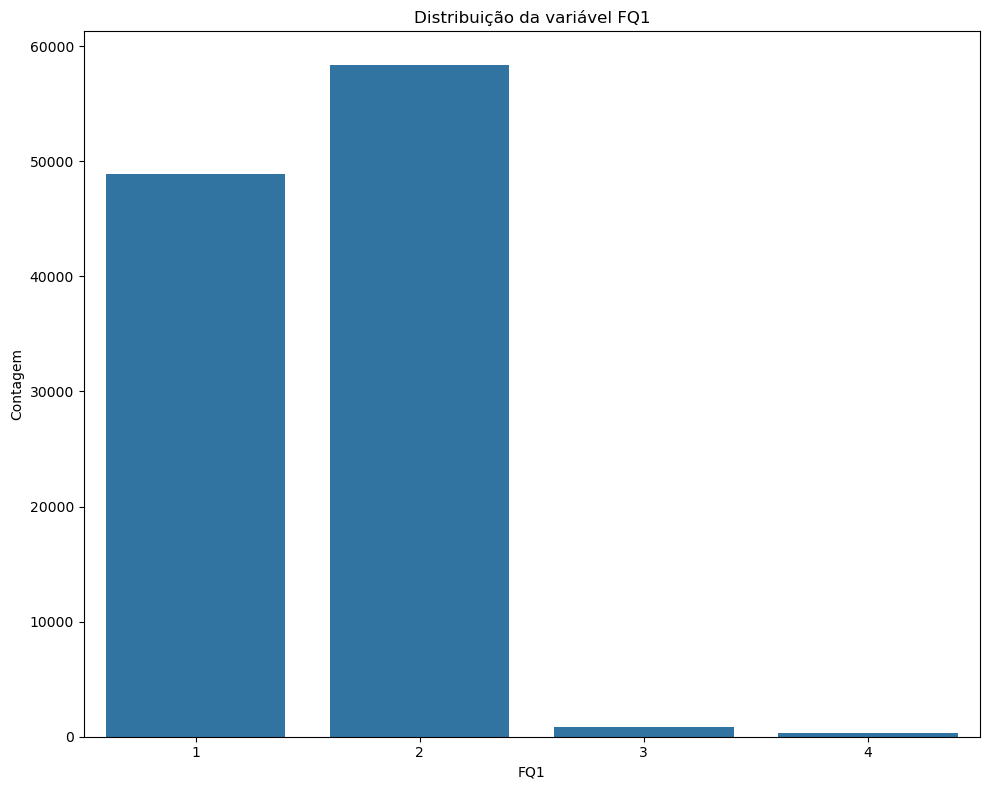

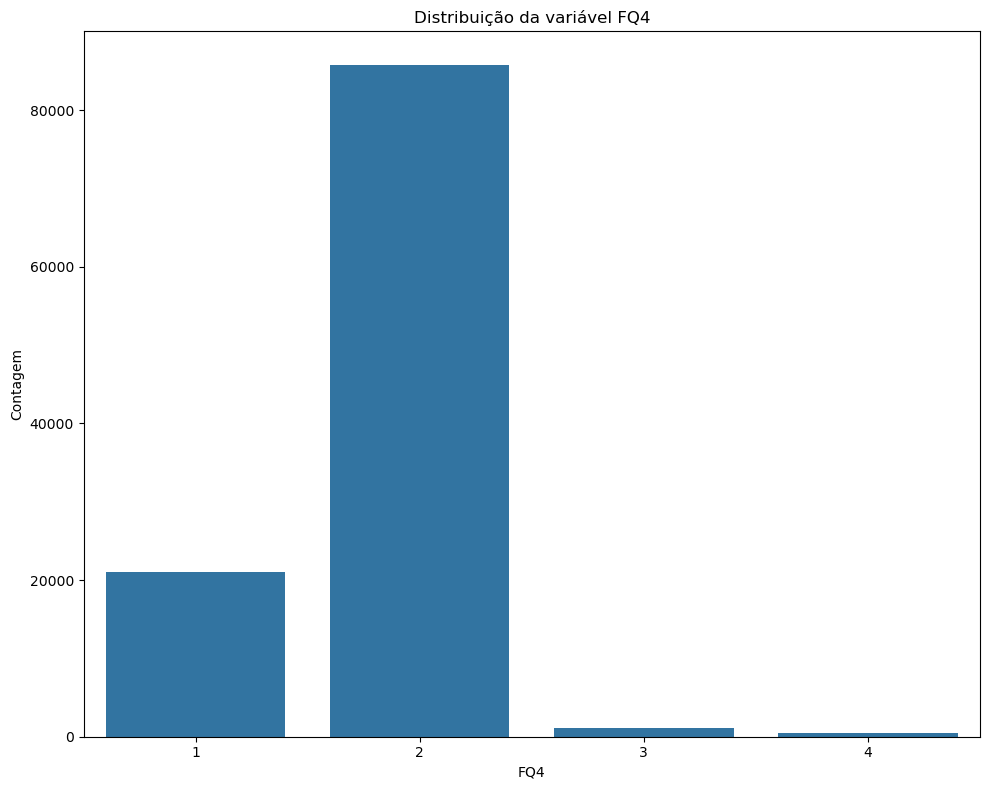

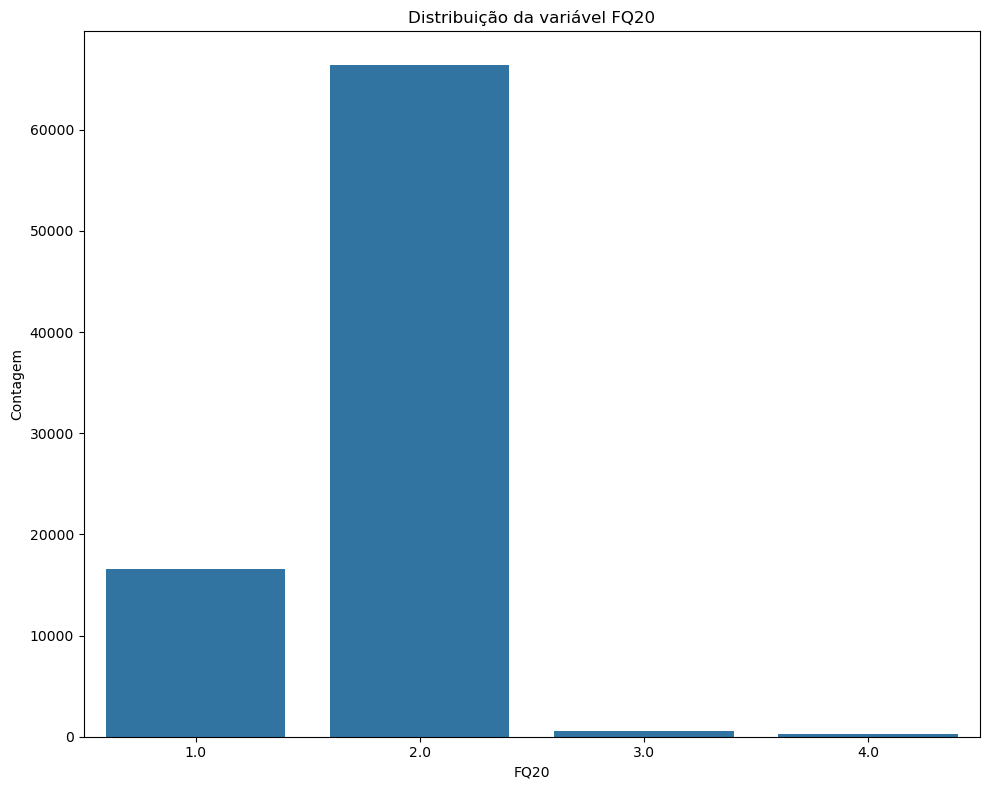

In [60]:
for val in variaveis:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=val)
    plt.title(f'Distribuição da variável {val}')
    plt.ylabel('Contagem')
    plt.xlabel(val)
    plt.tight_layout()
    plt.show()

### 1. Domínio da Categoria 2 em Todos os Gráficos

Em todas as variáveis (uso de caixa eletrônico, posse de cartão de crédito e envio de dinheiro), a categoria 2 é predominante, representando cerca de 60-80% das respostas. Sem conhecer o significado exato desta categoria, podemos supor que represente um uso ou acesso limitado a estes serviços (talvez "raramente usa" ou "usa ocasionalmente").

### 2. Distribuição Altamente Assimétrica

Todas as distribuições mostram uma forte assimetria, com concentração massiva nas categorias 1 e 2, enquanto as categorias 3 e 4 são extremamente minoritárias (menos de 5% em todos os casos). Isso sugere que comportamentos financeiros mais avançados ou frequentes são raros.

### 3. Diferenças no Equilíbrio entre Categorias 1 e 2

- **FQ1 (Caixas Eletrônicos)**: Relação mais equilibrada entre categorias 1 (~49.000) e 2 (~58.000)
- **FQ4 (Cartões de Crédito)**: Grande diferença entre categoria 1 (~21.000) e 2 (~85.000)
- **FQ20 (Envio de Dinheiro)**: Similar ao FQ4, com categoria 1 (~16.000) muito inferior à 2 (~66.000)

## Hipóteses

1. **Hipótese de Acesso Limitado**: A predominância da categoria 2 em todos os serviços sugere que a maioria da população tem contato com serviços financeiros, mas provavelmente de forma limitada ou ocasional, possivelmente devido a barreiras de acesso físico, custos ou confiança.
2. **Hipótese da Hierarquia de Necessidades Financeiras**: O uso de caixas eletrônicos mostra distribuição mais equilibrada entre categorias 1 e 2 comparado aos outros serviços, sugerindo que operações básicas de saque/depósito são mais amplamente adotadas que serviços mais avançados como cartão de crédito ou transferências.
3. **Hipótese de Infraestrutura vs. Adoção**: A baixa frequência nas categorias 3 e 4 pode indicar que, mesmo quando há infraestrutura disponível (caixas, cartões), a adoção frequente ou intensiva destes serviços é limitada por fatores culturais, educacionais ou econômicos.
4. **Hipótese de Remessas Alternativas**: O baixo uso formal de envio de dinheiro (FQ20), contrastando com a realidade africana de altas remessas familiares, sugere o uso predominante de canais informais ou alternativos (como mobile money) não capturados nesta variável.
5. **Hipótese de Transição Digital Incompleta**: O perfil muito similar entre os três serviços sugere uma população que iniciou a transição para serviços financeiros formais, mas ainda não completou esta jornada, possivelmente refletindo um estágio intermediário de inclusão financeira.
6. **Hipótese de Segmentação Extrema**: A concentração massiva nas categorias 1-2 versus o número diminuto nas categorias 3-4 sugere uma possível segmentação socioeconômica extrema, onde uma pequena elite tem acesso pleno e frequente a serviços financeiros, enquanto a grande maioria tem acesso limitado.
7. **Hipótese de Confiança vs. Utilidade**: A menor prevalência da categoria 1 em envio de dinheiro comparado a caixas eletrônicos pode indicar que serviços percebidos como mais úteis (transferências para família) superam barreiras de confiança mais facilmente que serviços vistos como menos essenciais.

### Analisando o comportamento acima em quartis de idade

In [61]:
df.age.describe()

count    108124.000000
mean         41.857395
std          17.876105
min          15.000000
25%          27.000000
50%          39.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64

In [62]:
def dividir_idade_em_quartis(df):
    df['faixa_idade'] = pd.qcut(df['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    return df

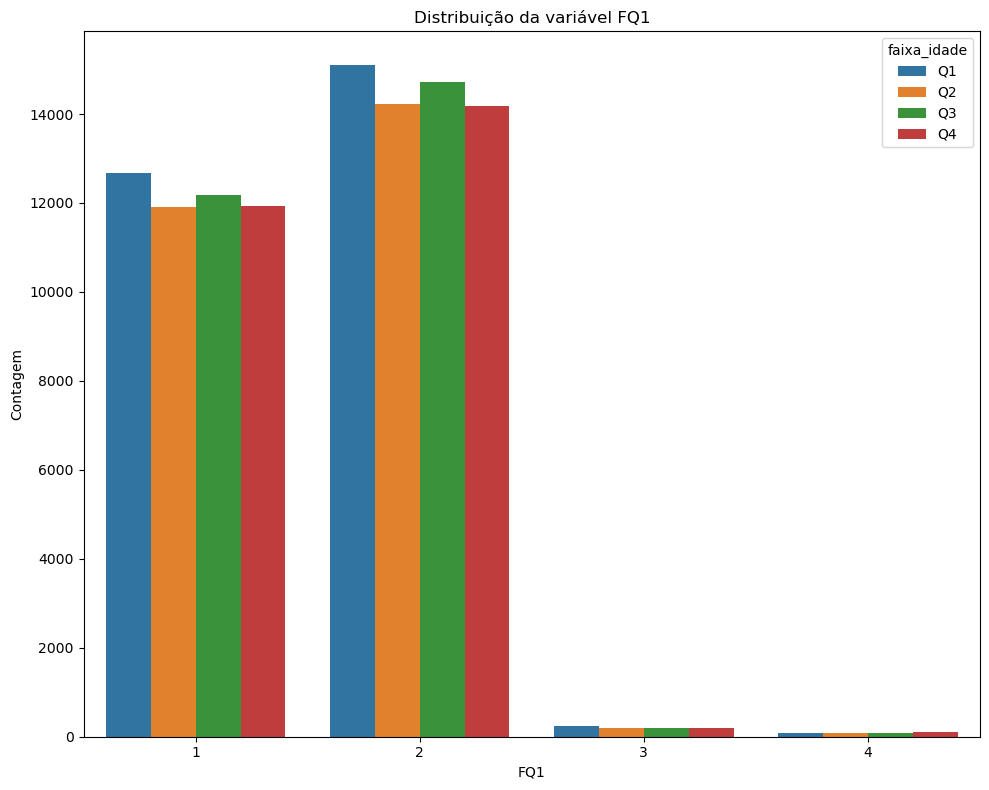

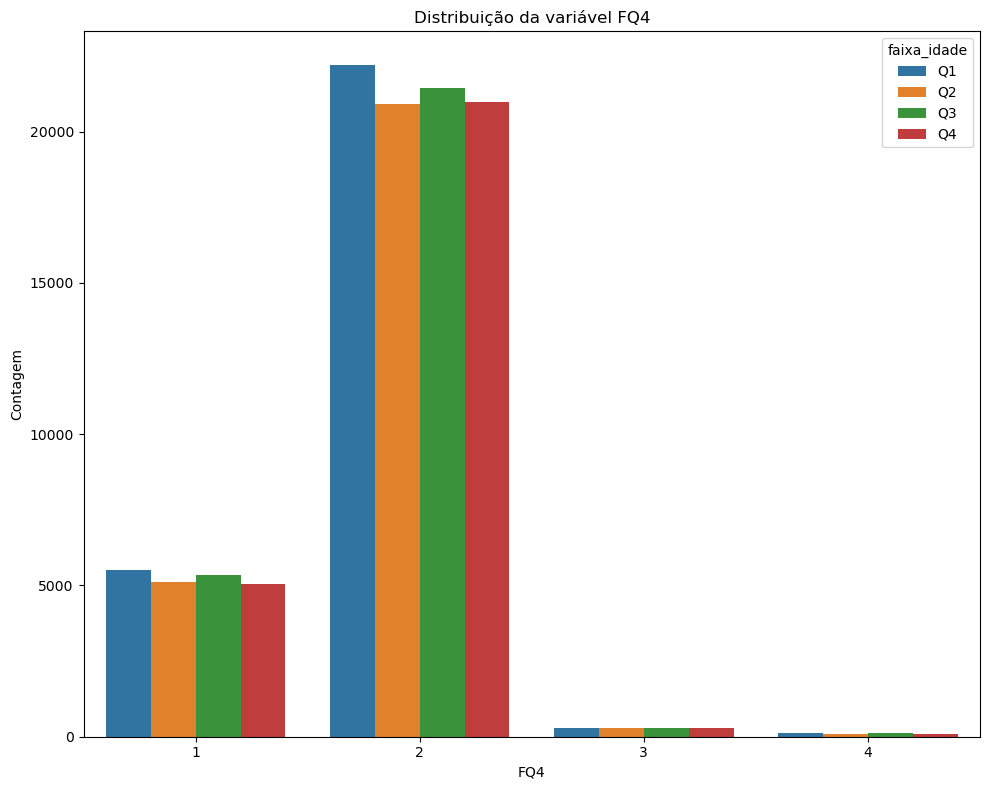

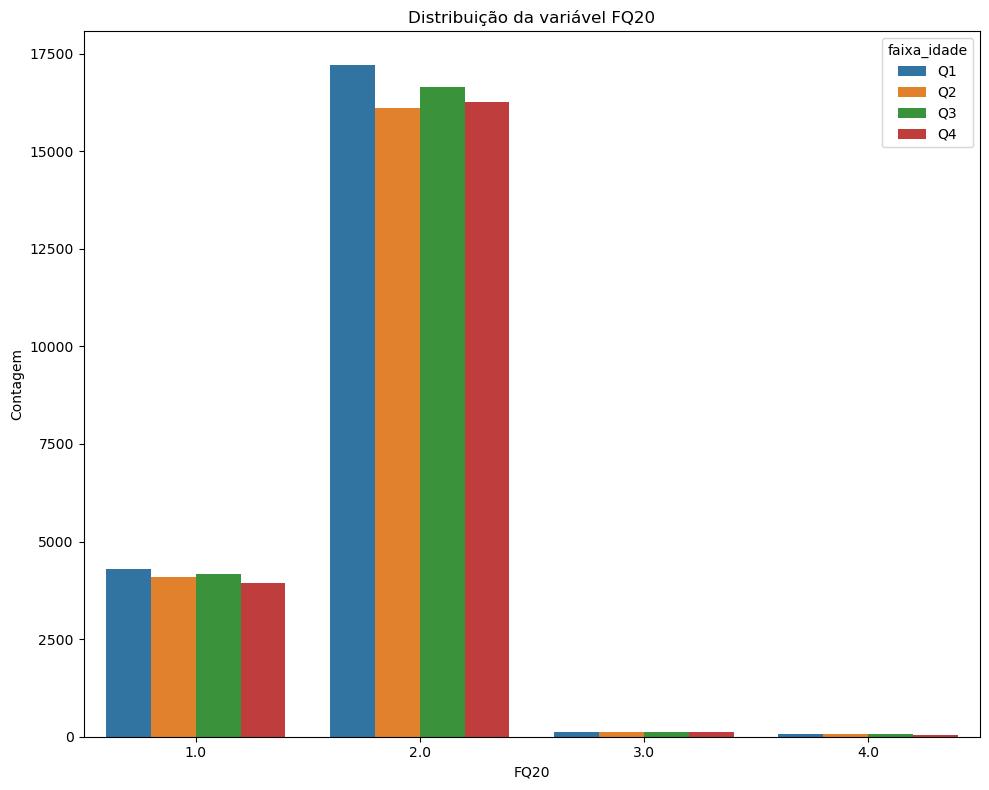

In [64]:
for val in variaveis:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=val, hue='faixa_idade')
    plt.title(f'Distribuição da variável {val}')
    plt.ylabel('Contagem')
    plt.xlabel(val)
    plt.tight_layout()
    plt.show()

Não há uma diferença tão significativa.

### Analisando as váriaveis

1. FQ7 -> POUPANÇA PARA NEGÓCIOS
2. FQ9 -> POUPANÇA PARA VELHICE
3. FQ10 -> POUPANÇA PARA INSTITUIÇÕES FINANCEIRAS

In [65]:
variaveis = ['FQ7', 'FQ9', 'FQ10']

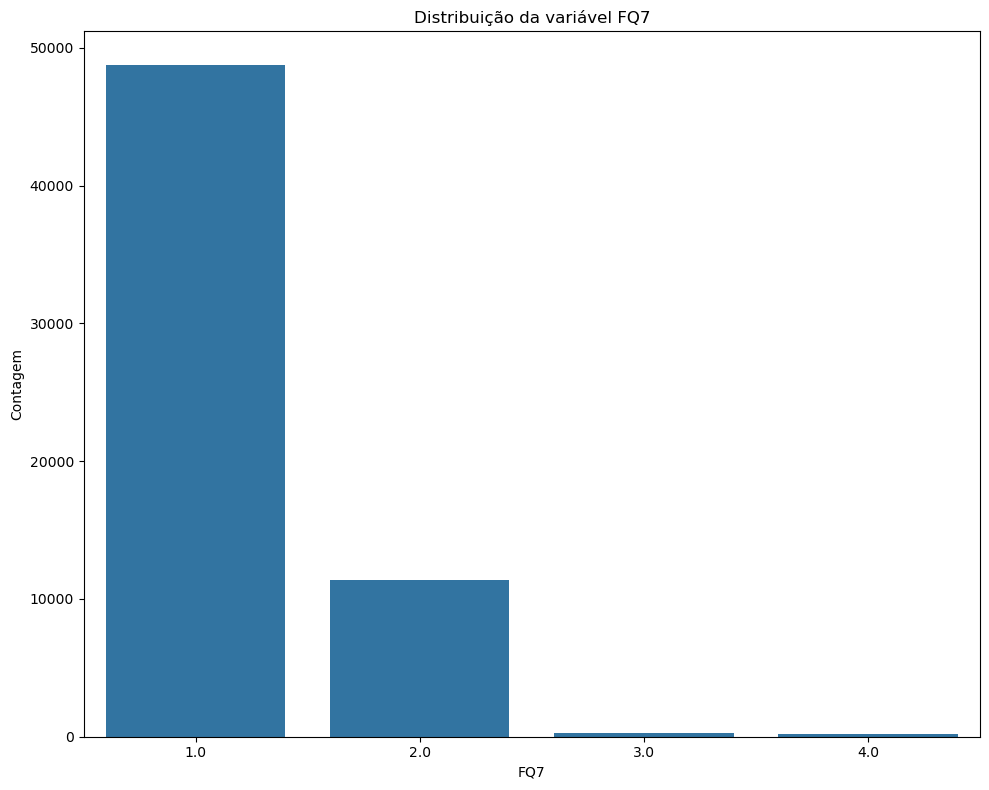

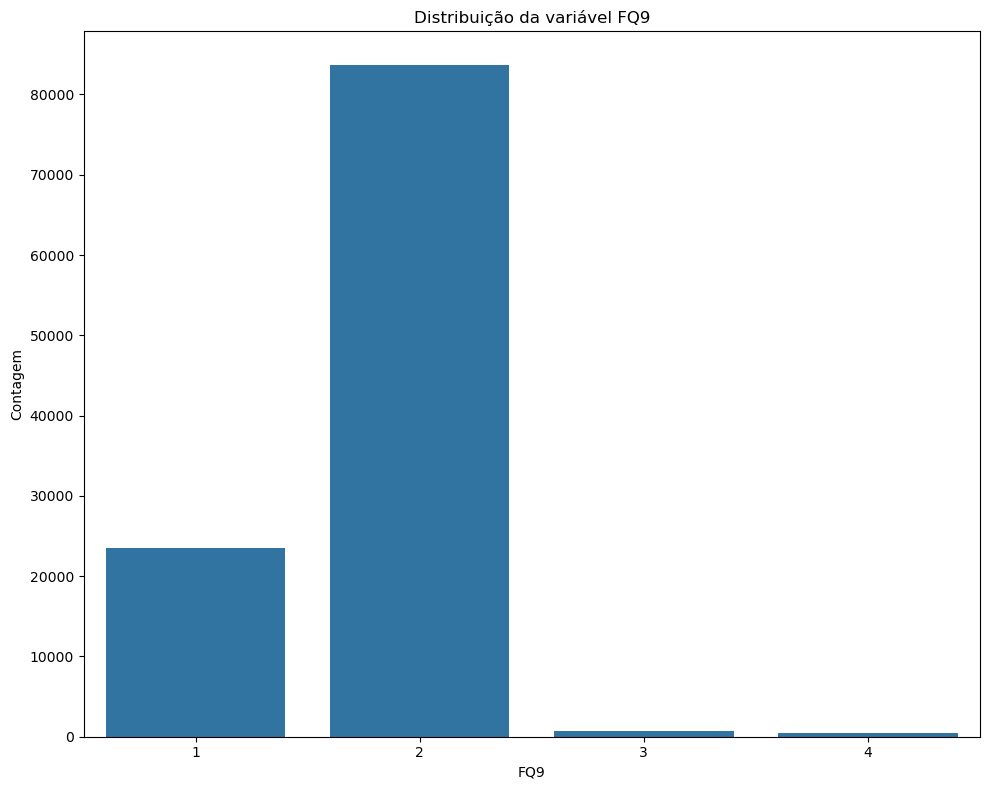

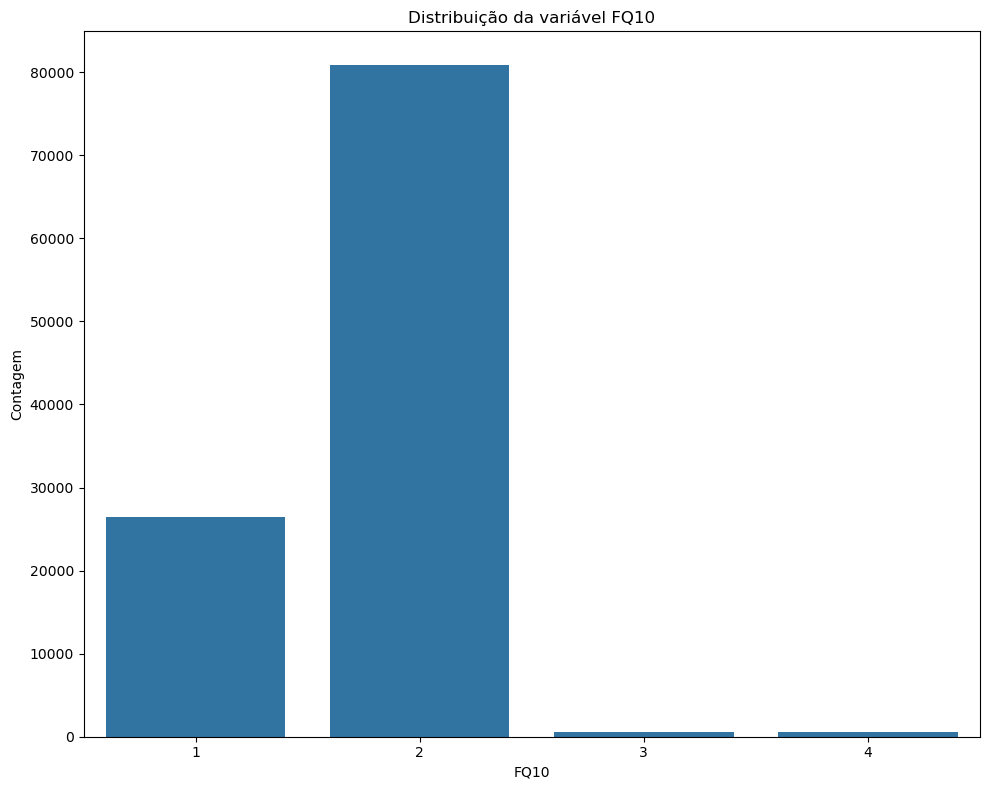

In [66]:
for val in variaveis:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=val)
    plt.title(f'Distribuição da variável {val}')
    plt.ylabel('Contagem')
    plt.xlabel(val)
    plt.tight_layout()
    plt.show()

### 1. Diferenças Marcantes nos Padrões de Poupança

Diferentemente dos gráficos anteriores sobre serviços financeiros, há uma variação significativa no padrão de distribuição entre os três tipos de poupança:

- **FQ7 (Poupança para Negócios)**: Forte dominância da categoria 1 (~48.000) sobre a categoria 2 (~11.000)
- **FQ9 (Poupança para Velhice)**: Dominância inversa, com categoria 2 (~83.000) muito superior à categoria 1 (~23.000)
- **FQ10 (Poupança em Instituições Financeiras)**: Padrão similar ao FQ9, com categoria 2 (~80.000) dominando sobre categoria 1 (~26.000)

### 2. Contraste na Poupança para Negócios

A poupança para negócios (FQ7) apresenta um padrão completamente inverso às outras formas de poupança, com forte concentração na categoria 1 em vez da categoria 2, sugerindo diferentes comportamentos ou barreiras específicas.

### 3. Consistência das Categorias 3 e 4

Em todos os tipos de poupança, as categorias 3 e 4 permanecem extremamente minoritárias (menos de 1%), mantendo o padrão visto nos gráficos anteriores de serviços financeiros.

## Hipóteses

1. **Hipótese do Empreendedorismo Informal**: A predominância da categoria 1 na poupança para negócios sugere que, embora exista forte cultura empreendedora, ela ocorre predominantemente no setor informal ou através de métodos tradicionais de poupança (como grupos de poupança comunitários), em vez de utilizar o sistema financeiro formal.
2. **Hipótese de Priorização de Curto Prazo**: O contraste entre poupança para negócios (majoritariamente categoria 1) versus poupança para velhice (majoritariamente categoria 2) pode indicar que existe maior urgência e prioridade para investimentos produtivos imediatos do que para planejamento de longo prazo.
3. **Hipótese de Desconfiança Institucional**: A forte predominância da categoria 2 na poupança em instituições financeiras pode refletir desconfiança generalizada nas instituições formais, possivelmente devido a experiências históricas de instabilidade financeira, inflação ou colapsos bancários na região.
4. **Hipótese do Ciclo de Vida Financeiro**: O baixo engajamento com poupança para velhice (categoria 1 menor) pode refletir tanto uma estrutura demográfica jovem quanto sistemas de suporte familiar tradicionais que substituem a necessidade percebida de poupança formal para aposentadoria.
5. **Hipótese de Barreiras de Acesso versus Culturais**: A semelhança entre os padrões de poupança para velhice e em instituições financeiras sugere que as barreiras podem ser mais estruturais (acesso, documentação, requisitos mínimos) do que culturais ou comportamentais.
6. **Hipótese de Poupança Comunitária versus Institucional**: A diferença entre poupança para negócios (categoria 1 dominante) e poupança em instituições (categoria 2 dominante) pode indicar preferência por mecanismos comunitários de poupança para empreendimentos, como tontines ou associações rotativas de crédito (ROSCAs), que são culturalmente enraizados e socialmente reforçados.
7. **Hipótese de Confiança Diferenciada por Objetivo**: A disposição para poupar formalmente varia significativamente conforme o objetivo - negócios parecem inspirar uma abordagem mais direta e pessoalmente controlada, enquanto poupança para velhice pode ser vista como algo mais abstrato e que requer intermediação institucional.
8. **Hipótese do Capital de Giro vs. Capital de Reserva**: A predominância da categoria 1 em poupança para negócios pode refletir a necessidade constante de acesso imediato a capital de giro, enquanto a poupança para velhice (predominantemente categoria 2) representa uma reserva de longo prazo que pode ser mais facilmente institucionalizada.

### Verificando relação entre algumas váriaveis.

1. FQ33 -> TELEFONE CELULAR
2. FQ34 -> ID NACIONAL
3. TARGET

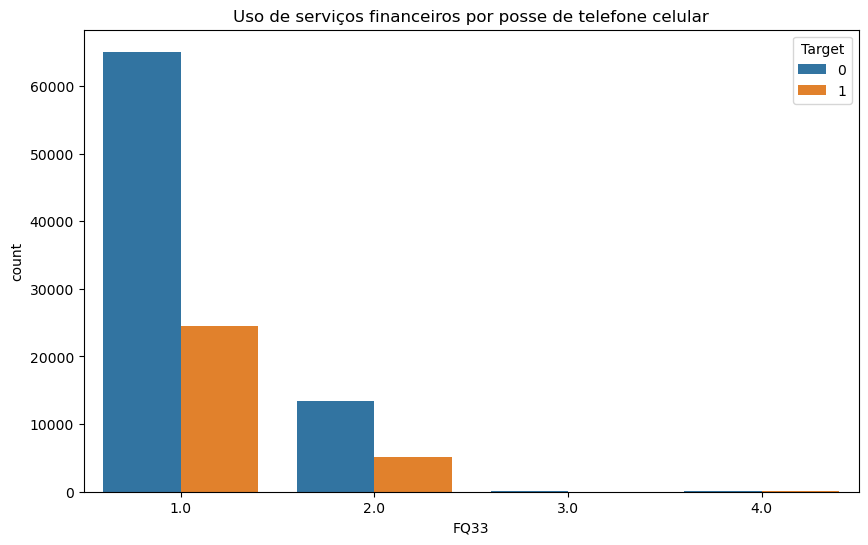

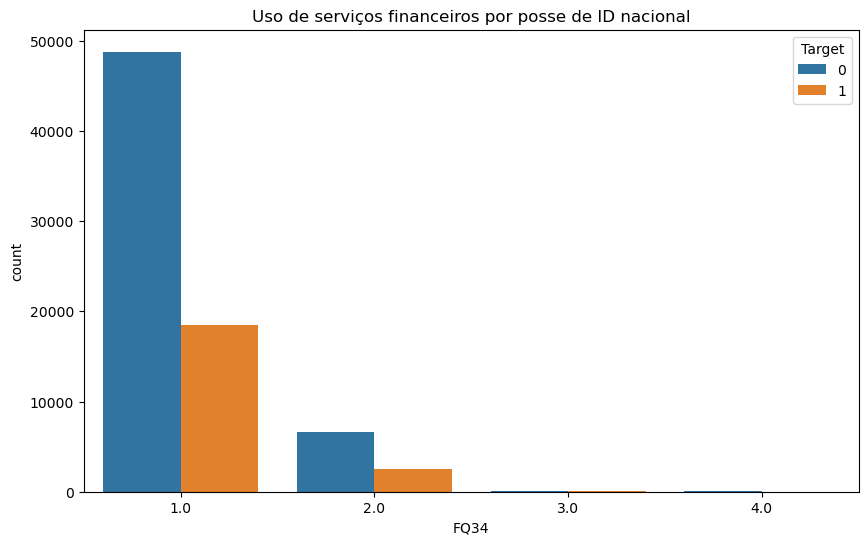

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FQ33', hue='Target')
plt.title('Uso de serviços financeiros por posse de telefone celular')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FQ34', hue='Target')
plt.title('Uso de serviços financeiros por posse de ID nacional')
plt.show()

## Insights Principais

Analisando os dois gráficos que relacionam o uso de serviços financeiros com a posse de documentos de identidade e telefones celulares na África, identifico padrões importantes:

### 1. Predominância de Não-Usuários de Serviços Financeiros

Em ambos os gráficos, a barra azul (Target = 0, indicando não-uso de serviços financeiros) é significativamente maior que a barra laranja (Target = 1, indicando uso), independentemente da categoria de posse de ID ou celular.

### 2. Concentração na Categoria 1

A categoria 1 é dominante tanto para ID nacional quanto para posse de celular, com números muito menores nas categorias 2-4, sugerindo possível significado como "possui" vs "não possui" ou algum nível de acesso/uso básico.

### 3. Padrões Similares Entre ID Nacional e Celular

Os padrões de distribuição são bastante similares entre os dois gráficos, sugerindo correlação entre posse de ID nacional e celular, ou impactos semelhantes dessas variáveis no uso de serviços financeiros.

### 4. Proporção de Uso mais Favorável na Categoria 1

Embora a maioria não use serviços financeiros em todas as categorias, a proporção de usuários (laranja) em relação a não-usuários (azul) é mais favorável na categoria 1 do que na categoria 2, para ambas as variáveis.

## Hipóteses

1. **Hipótese de Barreira Documental**: A distribuição sugere que a posse de ID nacional é pré-requisito para acesso a serviços financeiros, mas não suficiente sozinha - aproximadamente 27% das pessoas na categoria 1 de ID nacional (estimativa visual ~19.000 de ~68.000 total) usam serviços financeiros.
2. **Hipótese de Acesso Digital**: A similaridade dos padrões entre ID nacional e telefone celular sugere que ambos funcionam como habilitadores complementares de serviços financeiros, possivelmente indicando que soluções financeiras digitais móveis dependem de ambos para utilização efetiva.
3. **Hipótese de Casualidade vs. Correlação**: A relação similar entre ambas as variáveis e o uso de serviços financeiros pode indicar que um terceiro fator (como renda, urbanização ou educação) influencia simultaneamente a posse de ID, a posse de celular e o uso de serviços financeiros.
4. **Hipótese de Desigualdade Digital**: As menores proporções de uso financeiro na categoria 2 podem indicar uma "segunda classe digital" - pessoas com acesso parcial ou limitado a documentação e tecnologia, que enfrentam barreiras ainda maiores para inclusão financeira.
5. **Hipótese de Etapas de Inclusão**: Os dados sugerem um possível "funil de inclusão" onde a documentação e conectividade são passos iniciais, mas insuficientes sem outros fatores como educação financeira, confiança institucional ou produtos adequados para converter posse em uso efetivo.
6. **Hipótese de Mobile Money sem Bancarização**: A proporção significativa de pessoas com acesso a celular (categoria 1) que não usam serviços financeiros sugere que muitos usuários de celular ainda não foram convertidos para serviços financeiros móveis, representando um grande potencial de mercado.
7. **Hipótese de Barreira Dupla**: O uso muito limitado de serviços financeiros nas categorias 2-4 sugere que há uma barreira dupla: além da falta de ID/celular, há outros fatores limitantes substanciais, possivelmente relacionados à oferta inadequada de serviços nas áreas onde essas populações se concentram.

## Recomendações Estratégicas

1. **Incentivos para Registro Duplo**: Programas que conectam a emissão de IDs nacionais com acesso a telefones celulares básicos poderiam potencializar significativamente a inclusão financeira.
2. **Produtos Financeiros Específicos para Categoria 1**: Desenvolver produtos financeiros específicos para pessoas que já possuem ID e celular, focando em remover as barreiras não-documentais que impedem o uso (como letramento financeiro, confiança, custos transacionais).
3. **Pesquisa Qualitativa Focada**: Investigar especificamente as experiências de pessoas na categoria 1 (tanto usuários quanto não-usuários de serviços financeiros) para entender melhor quais fatores, além da documentação e conectividade, determinam o uso.
4. **Política Pública de ID Digital**: Desenvolver sistemas de identificação digital vinculados a telefones celulares poderia criar um caminho direto para inclusão financeira, especialmente em regiões onde a infraestrutura bancária física é limitada.